In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Random dataset

In [2]:
df = pd.DataFrame(np.random.normal(0, 1, (100,2)))
df.columns = ['x', 'y'] 

## Regression model for comparison

In [4]:
x = df['x']
y = df['y']

In [10]:
# Polygit -> fit a polynominal of deg degree to point x y
fit = np.polyfit(x, y, deg=1)

In [11]:
# linspace -> Return evenly spaced numbers over a specified interval.
_x = np.linspace(x.min(), x.max(), num=len(y))

## Quantile regression model for six quantiles

In [14]:
# https://www.statsmodels.org/dev/generated/statsmodels.regression.quantile_regression.QuantReg.html

In [15]:
# ~ -> Bitwise NOT (1 if the bit is 0 and 0 if the bit is 1.)
model = smf.quantreg('y ~ x', df)

In [16]:
quantiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.95]

In [17]:
fits = [model.fit(q=q) for q in quantiles]

## Quantile lines

In [18]:
_y_005 = fits[0].params['x'] * _x + fits[0].params['Intercept']
_y_095 = fits[5].params['x'] * _x + fits[5].params['Intercept']

In [19]:
## Start and end coortinates of quantile lines

In [24]:
# Stack 1-D arrays as columns into a 2-D array.
p = np.column_stack((x,y))

In [25]:
# First point of 0.05 quantile
a = np.array([_x[0], _y_005[0]])
# Last point of 0.05 quantile
b = np.array([_x[-1], _y_005[-1]])

In [26]:
a_ = np.array([_x[0], _y_095[0]])
b_ = np.array([_x[-1], _y_095[-1]])

## Mask for coordinates above 0.95 or below 0.05 quantile lines

In [27]:
mask = lambda p, a, b, a_, b_: (np.cross(p-a, b-a) > 0) | (np.cross(p - a_, b_ - a_) < 0)

In [28]:
mask = mask(p, a, b, a_, b_)

## Generate the plots

Text(0, 0.5, 'y')

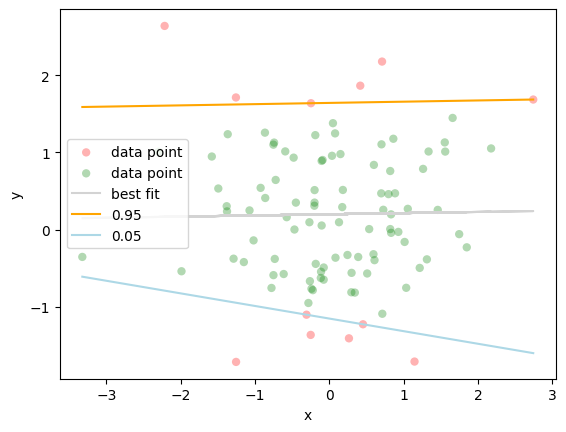

In [32]:
figure, axes = plt.subplots()
axes.scatter(x[mask], df['y'][mask], facecolor='r', 
edgecolor='none', alpha=0.3, label='data point')
axes.scatter(x[~mask], df['y'][~mask], facecolor='g', 
edgecolor='none', alpha=0.3, label='data point')
axes.plot(x, fit[0] * x + fit[1], label='best fit', c='lightgrey')
axes.plot(_x, _y_095, label=quantiles[5], c='orange')
axes.plot(_x, _y_005, label=quantiles[0], c='lightblue')
axes.legend()
axes.set_xlabel('x')
axes.set_ylabel('y')